In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('reviews.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36400 entries, 61d6837c-149a-45be-942f-24c2e54a0103 to 345a734f-9f42-41ea-9b17-8e74fc0f2b5f
Data columns (total 4 columns):
movie      36400 non-null object
title      36400 non-null object
comment    36400 non-null object
rating     36400 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [3]:
df.head()

,movie,title,comment,rating
id,,,,
61d6837c-149a-45be-942f-24c2e54a0103,Avengers: Infinity War,This movie will blow your mind and break your...,Warning: Spoilers,10
557424fa-9059-4f74-8458-4eac354fac31,Avengers: Infinity War,A Summer Film That IS Even Better Than The Hy...,Warning: Spoilers,10
2994cd7c-8afb-4f57-9866-0d8ca3ab5988,Avengers: Infinity War,Excellent Film\n,I was amazed to see so many negative reviews; ...,9
7a18dcf5-b81d-46fd-9a6c-1e59f4779fcc,Avengers: Infinity War,The amount of people that don't understand th...,All the reviews that say this movie has no plo...,10
87f58e31-5cd0-4c4d-b808-18ba2c8cd037,Avengers: Infinity War,Epic conclusion to Marvel's first 10 years\n,Warning: Spoilers,10


In [4]:
df.count()

movie      36400
title      36400
comment    36400
rating     36400
dtype: int64

In [5]:
print ("------------- Comentarios por Película (" , (len(df["movie"].unique())) , ") -------------")
df["movie"].value_counts()


------------- Comentarios por Película ( 30 ) -------------


Avengers: Infinity War                               3571
Venom                                                2702
Pantera Negra                                        2579
El legado del diablo                                 2137
Un lugar en silencio                                 2135
Han Solo: Una historia de Star Wars                  2052
Bohemian Rhapsody                                    1870
Ready Player One: Comienza el Juego                  1609
Nace una estrella                                    1591
Jurassic World: El reino caído                       1502
Annihilation                                         1379
Mission: Impossible - Fallout                        1312
Deadpool 2                                           1084
Megalodón                                            1051
Tomb Raider: Las aventuras de Lara Croft             1037
Animales Fantásticos: Los crímenes de Grindelwald     946
Incredibles 2                                         837
Ocean's 8: Las

In [6]:
print ("------------- Rating promedio (" , (df["rating"].mean()) , ") -------------")


------------- Rating promedio ( 6.641510989010989 ) -------------


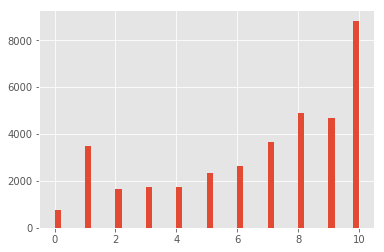

In [7]:
df["rating"].hist(bins=50)

In [8]:
len(df.loc[df["comment"]!='Warning: Spoilers'])

30034

In [9]:
len(df.loc[df["comment"]=='Warning: Spoilers'])

6366

In [35]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [36]:
filtered_reviews = []

In [47]:
reviews = []
for review in df["title"]:
    reviews.append(review.rstrip().lower())

In [49]:
stop_words = set(stopwords.words('english')) 

for review in reviews:
    word_tokens = word_tokenize(review) 
    filtered_review = [w.lower() for w in word_tokens if not w in stop_words] 
    filtered_review = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_review.append(w)
    filtered_reviews.append(filtered_review)

In [48]:
reviews[:10]

[' this movie will blow your mind and break your heart - and make you desperate to go back for more. brave, brilliant and better than it has any right to be.',
 ' a summer film that is even better than the hype',
 ' excellent film',
 " the amount of people that don't understand the movie is astonishing",
 " epic conclusion to marvel's first 10 years",
 ' again a fight, but bigger',
 ' overrated and bloated',
 ' the best superhero movie ever!!',
 ' an objective review of avengers: infinity war',
 ' great popcorn film, surprises the series with fresh takes']

In [50]:
filtered_reviews[:10]

[['movie',
  'blow',
  'mind',
  'break',
  'heart',
  '-',
  'make',
  'desperate',
  'go',
  'back',
  '.',
  'brave',
  ',',
  'brilliant',
  'better',
  'right',
  '.'],
 ['summer', 'film', 'even', 'better', 'hype'],
 ['excellent', 'film'],
 ['amount', 'people', "n't", 'understand', 'movie', 'astonishing'],
 ['epic', 'conclusion', 'marvel', "'s", 'first', '10', 'years'],
 ['fight', ',', 'bigger'],
 ['overrated', 'bloated'],
 ['best', 'superhero', 'movie', 'ever', '!', '!'],
 ['objective', 'review', 'avengers', ':', 'infinity', 'war'],
 ['great', 'popcorn', 'film', ',', 'surprises', 'series', 'fresh', 'takes']]